<a href="https://colab.research.google.com/github/Monty-2003/DS_project1/blob/main/SCRIPTS/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [2]:
import os
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

def loadBookData():
  # The column names are adopted from the dataset page on Kaggle
  books = pd.read_csv('/content/drive/MyDrive/DS Project Course/Project1/books_data.csv')
  return books

def loadReviewsData():
  # The column names are adopted from the dataset page on Kaggle
  reviews = pd.read_csv('/content/drive/MyDrive/DS Project Course/Project1/Books_rating.csv')
  return reviews

Mounted at /content/drive


In [18]:
books = loadBookData()
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [4]:
books.head(20)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0
6,The Overbury affair (Avon),NaN,['Miriam Allen De Ford'],NaN,http://books.google.nl/books?id=mHLTngEACAAJ&d...,NaN,1960,http://books.google.nl/books?id=mHLTngEACAAJ&d...,NaN,NaN
7,A Walk in the Woods: a Play in Two Acts,NaN,['Lee Blessing'],NaN,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,1988,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,3.0
8,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,['Mary Fabyan Windeatt'],http://books.google.com/books/content?id=lmLqA...,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,Tan Books & Pub,2009-01-01,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,['Biography & Autobiography'],NaN
9,Rising Sons and Daughters: Life Among Japan's ...,Wardell recalls his experience as a foreign st...,['Steven Wardell'],NaN,http://books.google.nl/books?id=rbLZugEACAAJ&d...,Plympton PressIntl,1995,http://books.google.nl/books?id=rbLZugEACAAJ&d...,['Social Science'],NaN


In [5]:
reviews = loadReviewsData()

In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [7]:
reviews.head(20)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
5,0826414346,Dr. Seuss: American Icon,NaN,A2F6NONFUDB6UK,Malvin,2/2,4.0,1127174400,One of America's greatest creative talents,"""Dr. Seuss: American Icon"" by Philip Nel is a ..."
6,0826414346,Dr. Seuss: American Icon,NaN,A14OJS0VWMOSWO,Midwest Book Review,3/4,5.0,1100131200,A memorably excellent survey of Dr. Seuss' man...,Theodor Seuss Giesel was best known as 'Dr. Se...
7,0826414346,Dr. Seuss: American Icon,NaN,A2RSSXTDZDUSH4,J. Squire,0/0,5.0,1231200000,Academia At It's Best,When I recieved this book as a gift for Christ...
8,0826414346,Dr. Seuss: American Icon,NaN,A25MD5I2GUIW6W,"J. P. HIGBED ""big fellow""",0/0,5.0,1209859200,And to think that I read it on the tram!,Trams (or any public transport) are not usuall...
9,0826414346,Dr. Seuss: American Icon,NaN,A3VA4XFS5WNJO3,Donald Burnside,3/5,4.0,1076371200,Fascinating account of a genius at work,"As far as I am aware, this is the first book-l..."


# Preprocessing (clearing missing values)



In [8]:
# rename columns and drop NaNs from important variables
reviews['book_title'] = reviews['Title']
reviews['book_price'] = reviews['Price']
reviews['helpfulness'] = reviews['review/helpfulness']
reviews['score'] = reviews['review/score']
reviews['time'] = reviews['review/time']
reviews['summary'] = reviews['review/summary']
reviews['text'] = reviews['review/text']

reviews.drop(columns=['Title', 'Price', 'review/helpfulness', 'review/score', 'review/time', 'review/summary', 'review/text'], inplace=True)


reviews['book_price'].unique()
reviews.dropna(subset=['book_price', 'score', 'text'], inplace=True)


In [9]:
# split helpfulness column for better understanding
reviews[['rated_helpful', 'rated_total']] = reviews['helpfulness'].str.split('/', expand=True)

reviews['rated_helpful'] = reviews['rated_helpful'].astype(int)
reviews['rated_total'] = reviews['rated_total'].astype(int)

reviews['rated_unhelpful'] = reviews['rated_total'] - reviews['rated_helpful']

In [21]:
books['title'] = books['Title']

books.dropna(subset=['ratingsCount'], inplace=True)
books['ratings_count'] = books['ratingsCount'].astype(int)
books.drop(columns=['Title', 'infoLink', 'image', 'ratingsCount'], inplace=True)

# VADER sentiment score assignment

In [10]:
!pip install vaderSentiment

from vaderSentiment import SentimentIntensityAnalyzer

# create some features (not sure if we'll need these)
def count_words(text):
  return len(str(text).split())

reviews['text_word_count'] = reviews['text'].apply(count_words)
reviews['summary_word_count'] = reviews['summary'].apply(count_words)

analyzer = SentimentIntensityAnalyzer()
reviews['vader_sentiment'] = reviews['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

reviews.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.3 MB/s eta 0:00:00


,Id,User_id,profileName,book_title,book_price,helpfulness,score,time,summary,text,rated_helpful,rated_total,rated_unhelpful,text_word_count,summary_word_count,vader_sentiment
10,0829814000,AZ0IOBU20TBOP,Rev. Pamela Tinnin,Wonderful Worship in Smaller Churches,19.40,8/10,5.0,991440000,Outstanding Resource for Small Church Pastors,"I just finished the book, &quot;Wonderful Wors...",8,10,2,137,6,0.8857
11,0829814000,A373VVEU6Z9M0N,Dr. Terry W. Dorsett,Wonderful Worship in Smaller Churches,19.40,1/1,5.0,1291766400,Small Churches CAN Have Wonderful Worship,Many small churches feel like they can not hav...,1,1,0,55,6,0.5296
12,0829814000,AGKGOH65VTRR4,"Cynthia L. Lajoy ""Cindy La Joy""",Wonderful Worship in Smaller Churches,19.40,1/1,5.0,1248307200,Not Just for Pastors!,I just finished reading this amazing book and ...,1,1,0,217,4,0.9481
13,0829814000,A3OQWLU31BU1Y,Maxwell Grant,Wonderful Worship in Smaller Churches,19.40,1/1,5.0,1222560000,Small church pastor? This is the book on worship,I hadn't been a small church pastor very long ...,1,1,0,187,9,0.9944
14,0595344550,A3Q12RK71N74LB,Book Reader,Whispers of the Wicked Saints,10.95,7/11,1.0,1117065600,not good,I bought this book because I read some glowing...,7,11,4,176,2,0.9611


# Save data


In [22]:
# writing cleaned data
def save_cleaned_reviews(data):
  data.to_csv('/content/drive/MyDrive/DS Project Course/Project1/reviews_cleaned.csv')
def save_cleaned_books(data):
  data.to_csv('/content/drive/MyDrive/DS Project Course/Project1/books_cleaned.csv')

save_cleaned_reviews(reviews)
save_cleaned_books(books)

# EDA (from Mi2)

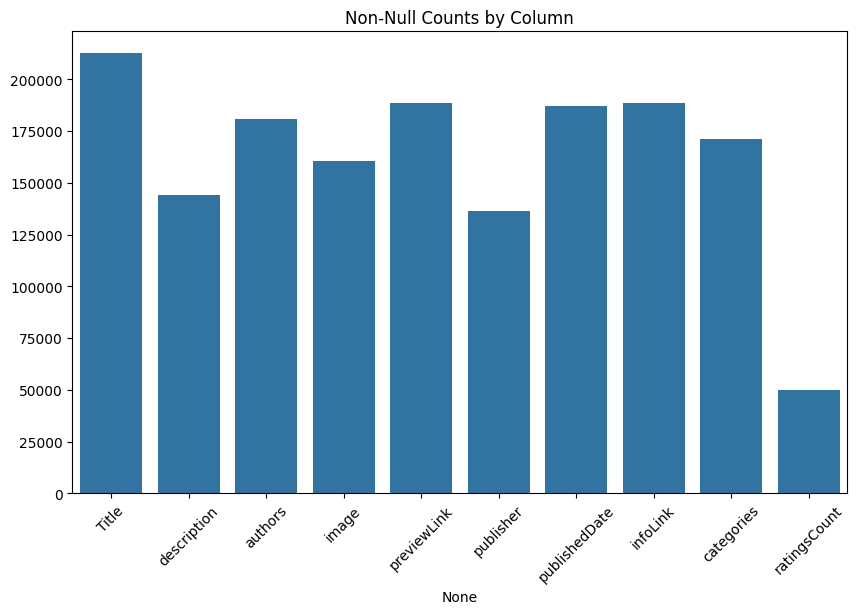

In [11]:
# plots for books data

# Calculate the non-null counts
non_null_counts = books.notnull().sum()

# Plot the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=non_null_counts.index, y=non_null_counts.values)
plt.title('Non-Null Counts by Column')
plt.xticks(rotation=45)
plt.show()

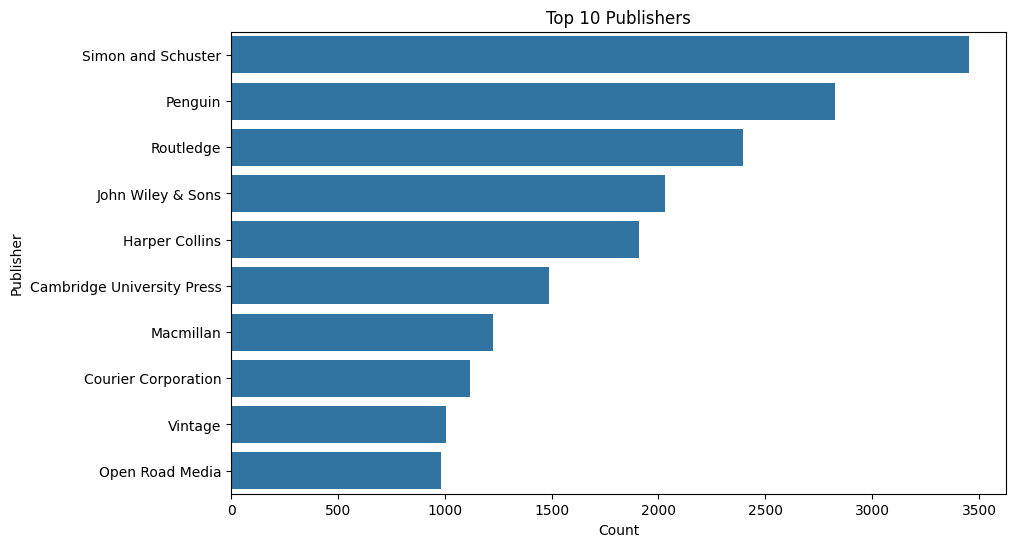

In [12]:
# Count the occurrences of each publisher
top_publishers = books['publisher'].value_counts().head(10)

# Bar plot for top publishers
plt.figure(figsize=(10,6))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title('Top 10 Publishers')
plt.xlabel('Count')
plt.ylabel('Publisher')
plt.show()

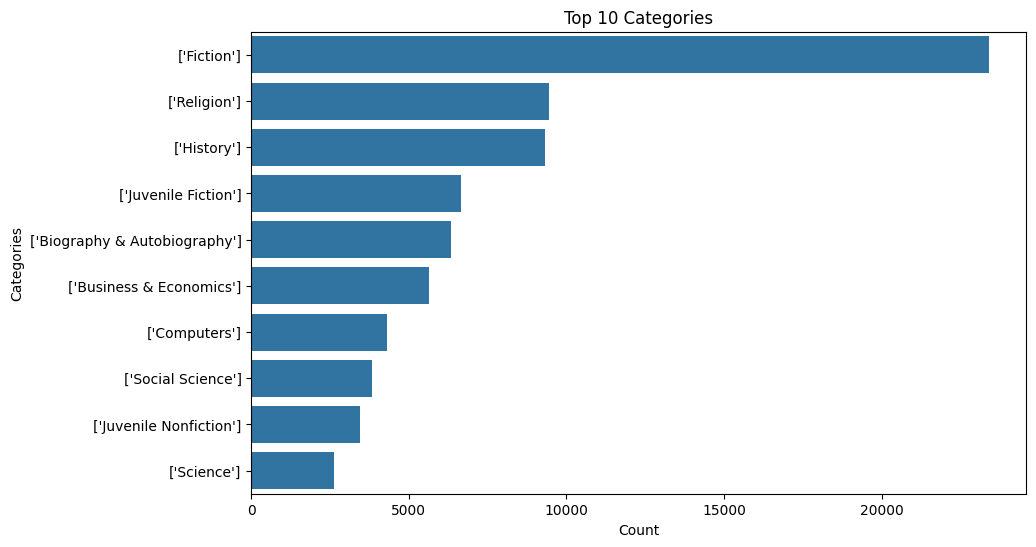

In [13]:
# Count the occurrences of each category
top_categories = books['categories'].value_counts().head(10)

# Bar plot for top categories
plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Categories')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.show()

In [14]:
# plots for book reviews table

# Get top 10 items by price
top_items_by_price = reviews.nlargest(10, 'Price')[['Title', 'Price']]

# Plot the top 10 most expensive items
plt.figure(figsize=(10,6))
sns.barplot(x='Price', y='Title', data=top_items_by_price)
plt.title('Top 10 Most Expensive Items')
plt.xlabel('Price')
plt.ylabel('Title')
plt.show()

KeyError: 'Price'

In [ ]:
# Scatter plot of Price vs Review Score
plt.figure(figsize=(10,6))
sns.scatterplot(x='Price', y='review/score', data=reviews)
plt.title('Price vs Review Score')
plt.xlabel('Price')
plt.ylabel('Review Score')
plt.show()

In [ ]:
# Count reviews by User_id
top_users = reviews['profileName'].value_counts().head(10)

# Plot the top 10 users by number of reviews
plt.figure(figsize=(10,6))
sns.barplot(x=top_users.values, y=top_users.index)
plt.title('Top 10 Users by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Username')
plt.show()

In [ ]:
sns.scatterplot()